# Regression

Now we will start to deal with *regression*. Regression refers to a problem where we want to produce a model that relates two variables to each other. Typically we talk about *independent* and *dependent* variables; you can also use the terms *predictor* and *response*, or others as you see fit and depending on the context of your problem.

A general sort of regression problem can be written as follows:
$$
\min_{\beta} \Vert Y - f(X, \beta) \Vert
$$

Here $Y$ are the measured dependent variables, $X$ are the measured independent variables, $\beta$ are the unknown parameter values that define our specific model, and $f$ is the model itself, i.e. a way to produce predictions out of independent variables and model parameters. The symbol $\Vert \cdot \Vert$ denotes a *norm*, i.e. a way of measuring how far off the model predictions $f(X, \beta)$ are from the true outcomes $Y$. The form of the function $f$, as well as the properties of the data $X$ and $Y$, determines the type of regression problem at hand.

We will focus especially on *linear regression*, i.e. cases in which the function $f$ depends linearly on the parameters $\beta$. Such problems can be written in the form:
$$
\min_{\beta} \Vert Y - A(X)\beta \Vert
$$
where $A(X)$ is a matrix that depends on the data $X$. Note that such a model is linear even when the matrix $A$ depends nonlinearly on the data $X$. That is to say, it is generally not the case that $A(X_1 + X_2) = A(X_1) + A(X_2)$. The matrix $A$ has to have a specific shape: it should have as many rows as the length of $Y$, and as many columns as the length of $\beta$. Generally, each column of $A$ will consist of some function applied to all the entries of $X$. We sometimes use the word *feature* for such functions. The linear regression problem tries to approximate the outputs $Y$ by a linear combination of features of $X$, where $\beta$ is the vector of coefficients of those features.

This form may seem restrictive, but it is in fact extremely general and will essentially take us all the way to the end of the course. To see how general this form really is, the following exercise will have you write down the matrix $A(X)$ for polynomial regression and for Fourier series.

# Exercise 1
## Part a: pencil and paper
### Polynomial regression
Suppose you have data $X = (x_1, x_2, \dots, x_n)$ and $Y=(y_1, y_2, \dots, y_n)$ where $x_i, y_i \in \mathbb{R}$. You suspect that the $y$'s can be written as a polynomial function of the $x$'s with degree at most $m$, i.e.
$$
y = c_0 + c_1 x + c_2 x^2 + \dots + c_m x^m
$$
write down a matrix $A$, which will depend on the data $X$, such that the vector of coefficients $c = (c_0, c_1, \dots, c_m)$ is the solution to the regression problem $\min_{c} Y - Ac$. What is the shape of $A$?

### Fourier series
Suppose you have data $X = (x_1, x_2, \dots, x_n)$ and $Y=(y_1, y_2, \dots, y_n)$ where $x_i, y_i \in \mathbb{R}$. You suspect that the $y$'s can be written as a Fourier cosine series $x$'s with known base frequency $\omega$ and up to $m$ harmonics, i.e.
$$
y = c_0 + c_1 \cos(\omega x) + c_2 \cos(2\omega x) + \dots + c_m \cos(m\omega x)
$$
write down a matrix $A$, which will depend on the data $X$, such that the vector of coefficients $c = (c_0, c_1, \dots, c_m)$ is the solution to the regression problem $\min_{c} Y - Ac$. What is the shape of $A$?

***Remark***: when $m = n-1$, the matrices you found above are referred to as Vandermonde and Discrete Cosine Transform matrices, respectively.

## Part b: coding
For each of the above subparts (polynomial regression and Fourier series), write a function that takes as input a data vector $X$ and returns the corresponding feature matrix $A(X)$

In [1]:
import numpy as np

def polynomial_feature_matrix(X, m = 1):
    """
    computes the matrix A(X) for use in polynomial regression

    INPUT:
        X = numpy array of length n giving measurements of the independent variable
        m = highest power to raise X to

    OUTPUT:
        A = matrix of monomial features of X up to order m
    """
    return np.empty_like(X)

def cosine_feature_matrix(X, m = 1, w = np.pi):
    """
    computes the matrix A(X) for use in Fourier cosine series regression

    INPUT:
        X = numpy array of length n giving measurements of the independent variable
        m = highest harmonic to include
        w = base frequency

    OUTPUT:
        A = matrix of cosine features of X up to the m-th harmonic of frequency w
    """
    return np.empty_like(X)

# test your functions
# be sure to try out other values of n, m, and w to make sure they work as intended

n = 100
m = 10
X = np.random.rand(n)

A1 = polynomial_feature_matrix(X, m)
A2 = cosine_feature_matrix(X, m)

# check the shapes of these matrices to make sure they agree with your answers above
A1.shape, A2.shape

((100,), (100,))

# Exercise 2
In this exercise you will demonstrate one of the main reasons that least-squares regression is so popular, namely that it can be carried out by inverting a small matrix (of size equal to the number of model terms, as opposed to the number of data points)

Suppose that you've created a matrix $A(X)$ as described above. Each column corresponds to a function of the independent variable $x$, and each row corresponds to one of the measurements, $x_i$. For the sake of generality, denote the entries of the matrix $A$ as $a_{ij}$, where $i=1\dots n$, $n$ being the number of measurements, and $j=1\dots m$, $m$ being the number of features.

## Part a: Gradient of the loss function
Let $E(\beta)$ denote the least-squares loss function, i.e.
$$
\begin{align}
E(\beta) &= \sum_{i=1}^{n} {1\over 2} (y_i - (A \beta)_i)^2\\
&= \sum_{i=1}^{n} {1\over 2} \left(y_i - \sum_{j=1}^{m}a_{ij}\beta_j\right)^2\\
\end{align}
$$
Show that the gradient of the loss function with respect to $\beta$ is given by:
$$
\nabla E(\beta) = -A^T (y - A\beta)
$$

## Part b: Simplifying the optimality condition
We know that at the minimum, the gradient of the loss function is equal to zero. This gives the equation
$$
\nabla E(\beta) = 0 \implies A^T A \beta = A^T y
$$

What is the shape of the matrix $A^T A$? What is the meaning of its entries?

Assuming that $A^T A$ is invertible (which is true as long as $A$ is full rank), we can simply write down the optimal solution:
$$
\hat{\beta} = (A^TA)^{-1} A^T y
$$

## Part c: Coding

Using the functions you wrote in Exercise 1, do the following:
* Compute the feature matrices ($A$) on some simulated data
* Compute $A^T A$ and inspect it (use a small $m$, say less than 5, so that you can read the matrix easily). Can you notice any differences between the polynomial case and the cosine series case?
* Generate some random output data $Y$ and use `scipy.linalg.inv` to invert $A^T A$ and get the least-squares solution to $Y = A(X)\beta$

In [ ]:
n = 100
m = 5
w = np.pi

X = np.random.rand(n)
Y = np.random.rand(n)

A1 = polynomial_feature_matrix(X, m)
A2 = cosine_feature_matrix(X, m, w)

# your code here

# Exercise 3 (coding)
Next, you will perform polynomial interpolation on data that truly do obey a polynomial relationship, corrupted by noise. To do this, follow the same procedure outlined in Exercise 2, part c above.

See how your computed results compare to the true function. How do they depend on the noise level? On the maximum polynomial degree you specify?

What do you get if you do cosine series regression on the same data?

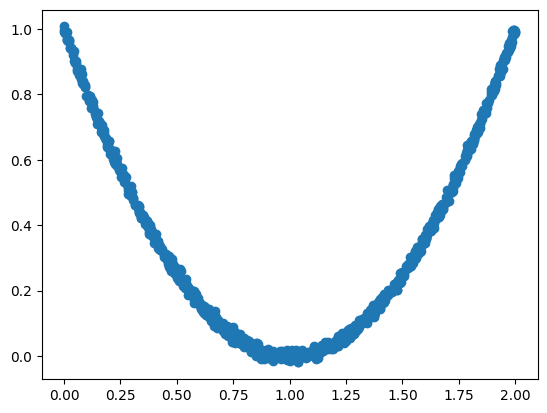

In [2]:
import matplotlib.pyplot as plt


N = 1000
noise_level = 1e-2
# define the true functional relationship between x and y
truefunction = lambda x : (x-1)**2

# generate synthetic data, random samples on [0, 2]
xdata = 2*np.random.rand(N)
# generate noise to add to the true function
noise = np.random.randn(N)*noise_level
ydata = truefunction(xdata) + noise

plt.scatter(xdata, ydata)